## 读处理后的数据

In [4]:
import pandas as pd

In [5]:
# 或者从已经保存到本地的数据中加载
data=pd.read_csv('E:\code\python_code\BDManager\sunshaolong\hoteldata\酒店评论_语料.csv',index_col=0)
data.head()

,title,review,rating,label,text,content
0,积分兑换的超值房,酒店离西安火车站一街之隔，但算是闹中取静；服务员非常热情，对待客人礼貌有加；房间内卫生良好，...,4,1,积分兑换的超值房。酒店离西安火车站一街之隔，但算是闹中取静；服务员非常热情，对待客人礼貌有加...,积分 兑换 超值 酒店 火车站 算是 闹中取静 服务员 热情 对待 客人 礼貌 有加 房间内...
1,离车站近,住的那间房价格是里面比较便宜的，窗子真的挺小，好在还是有窗户的，没窗户的肯定会更难受。大床房...,3,-1,离车站近。住的那间房价格是里面比较便宜的，窗子真的挺小，好在还是有窗户的，没窗户的肯定会更难...,车站 房价格 便宜 窗子 窗户 窗户 肯定 难受 床房 被子 有点 空调 有点 好像 不怎么...
2,离火车站挺近,位置还不错，在钟楼和火车站中间，走路去火车站十分钟。在一个巷子里面，在北新街上有招牌指引进去...,5,1,离火车站挺近。位置还不错，在钟楼和火车站中间，走路去火车站十分钟。在一个巷子里面，在北新街上...,火车站 位置 不错 火车站 走路 火车站 巷子 招牌 指引 进去 好找 服务员
3,离火车站很近,最大的好处就是离火车站很近，前往秦始皇兵马俑、华山的公交车都在火车站广场发车，住在该酒店出发...,4,1,离火车站很近。最大的好处就是离火车站很近，前往秦始皇兵马俑、华山的公交车都在火车站广场发车，...,火车站 最大 火车站 兵马俑 公交车 火车站 广场 发车 酒店 出发 方便 设施 不错 早餐
4,第一次住7天 服务和价格都非常不错 房间很小但是足够睡一觉,就在火车站附近 附近也有机场大巴 位置不错\r\n酒店边上环境稍差 比较脏乱差\r\n第一次...,5,1,第一次住7天 服务和价格都非常不错 房间很小但是足够睡一觉。就在火车站附近 附近也有机场大巴...,服务 价格 不错 房间 很小 足够 火车站 机场 大巴 位置 不错 酒店 环境 稍差 脏乱差...


In [13]:
print(data['content'].shape)
print(data['content'].dropna().shape)

(43172,)
(43142,)


In [21]:
d_=data[['content','label']].dropna()

In [25]:
d_.head()

,content,label
0,积分 兑换 超值 酒店 火车站 算是 闹中取静 服务员 热情 对待 客人 礼貌 有加 房间内...,1
1,车站 房价格 便宜 窗子 窗户 窗户 肯定 难受 床房 被子 有点 空调 有点 好像 不怎么...,-1
2,火车站 位置 不错 火车站 走路 火车站 巷子 招牌 指引 进去 好找 服务员,1
3,火车站 最大 火车站 兵马俑 公交车 火车站 广场 发车 酒店 出发 方便 设施 不错 早餐,1
4,服务 价格 不错 房间 很小 足够 火车站 机场 大巴 位置 不错 酒店 环境 稍差 脏乱差...,1


In [26]:
X=d_['content']
y=d_['label']

## bertopic训练
减少主题（特征）个数

In [2]:
from bertopic import BERTopic

In [27]:
topic_model = BERTopic(language="chinese (simplified)",
                                # embedding_model=''
                                calculate_probabilities=True,
                                verbose=True,
                                nr_topics='auto'# 自动
                                )
# 好评分类
topics1, probs = topic_model.fit_transform(X.to_list())

Batches: 100%|██████████| 1349/1349 [23:06<00:00,  1.03s/it]
2022-12-11 14:45:09,681 - BERTopic - Transformed documents to Embeddings
2022-12-11 14:45:35,695 - BERTopic - Reduced dimensionality
2022-12-11 14:52:44,746 - BERTopic - Clustered reduced embeddings
2022-12-11 14:52:57,176 - BERTopic - Reduced number of topics from 279 to 100


In [29]:

topic_model.save('E:\code\python_code\BDManager\sunshaolong\model\中文分词模型_剪枝100特征')

In [34]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,27634,-1_酒店_服务_房间_不错
1,0,7458,0_酒廊_服务_朋友_热情
2,1,1036,1_泳池_游泳_健身房_健身
3,2,786,2_会议_宴会厅_配合_会场
4,3,783,3_中餐厅_菜品_用餐_包间
...,...,...,...
95,94,11,94_硬件_软件_儿女_插头
96,95,11,95_泳衣_浴袍_提前_好评
97,96,11,96_生日会_生日蛋糕_生日派对_蛋糕
98,97,10,97_必须品_出长_干净_打扫


In [30]:
topic_model.visualize_topics()

In [31]:
topic_model.visualize_hierarchy()
# topic_model.get_topic(20)

In [32]:
X=pd.DataFrame(probs,columns=topic_model.get_topic_info()['Name'][1:],index=d_.index)
y=d_.label

In [33]:
X.shape,y.shape

((43142, 99), (43142,))

In [36]:
import os
os.chdir('E:\code\python_code\BDManager\sunshaolong\model')

In [37]:
# 保存一步数据
pd.concat([X,y],axis=1).to_csv('topic2vec数据_剪枝.csv')

In [38]:
#划分训练集和测试集 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=0,
                                                    test_size=0.2)

In [41]:
from imblearn.over_sampling import BorderlineSMOTE
smo=BorderlineSMOTE(random_state=0)
print('采样前：',X_train.shape)
print(y_train.value_counts())
X__train,y__train = smo.fit_resample(X_train,y_train)
print('采样后：',X__train.shape)
print(y__train.value_counts())

采样前： (34513, 99)
 1    33182
-1     1331
Name: label, dtype: int64
采样后： (66364, 99)
 1    33182
-1    33182
Name: label, dtype: int64


In [42]:
from sklearn.svm import SVC
# baseline svm
svm=SVC(probability=True)
svm.fit(X__train,y__train)
print(svm.score(X_test,y_test))

0.8559508633677135


In [43]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
# y=svm.predict(X_test)
pd.Series(y).value_counts() 

 1    7200
-1    1429
dtype: int64

<AxesSubplot: >

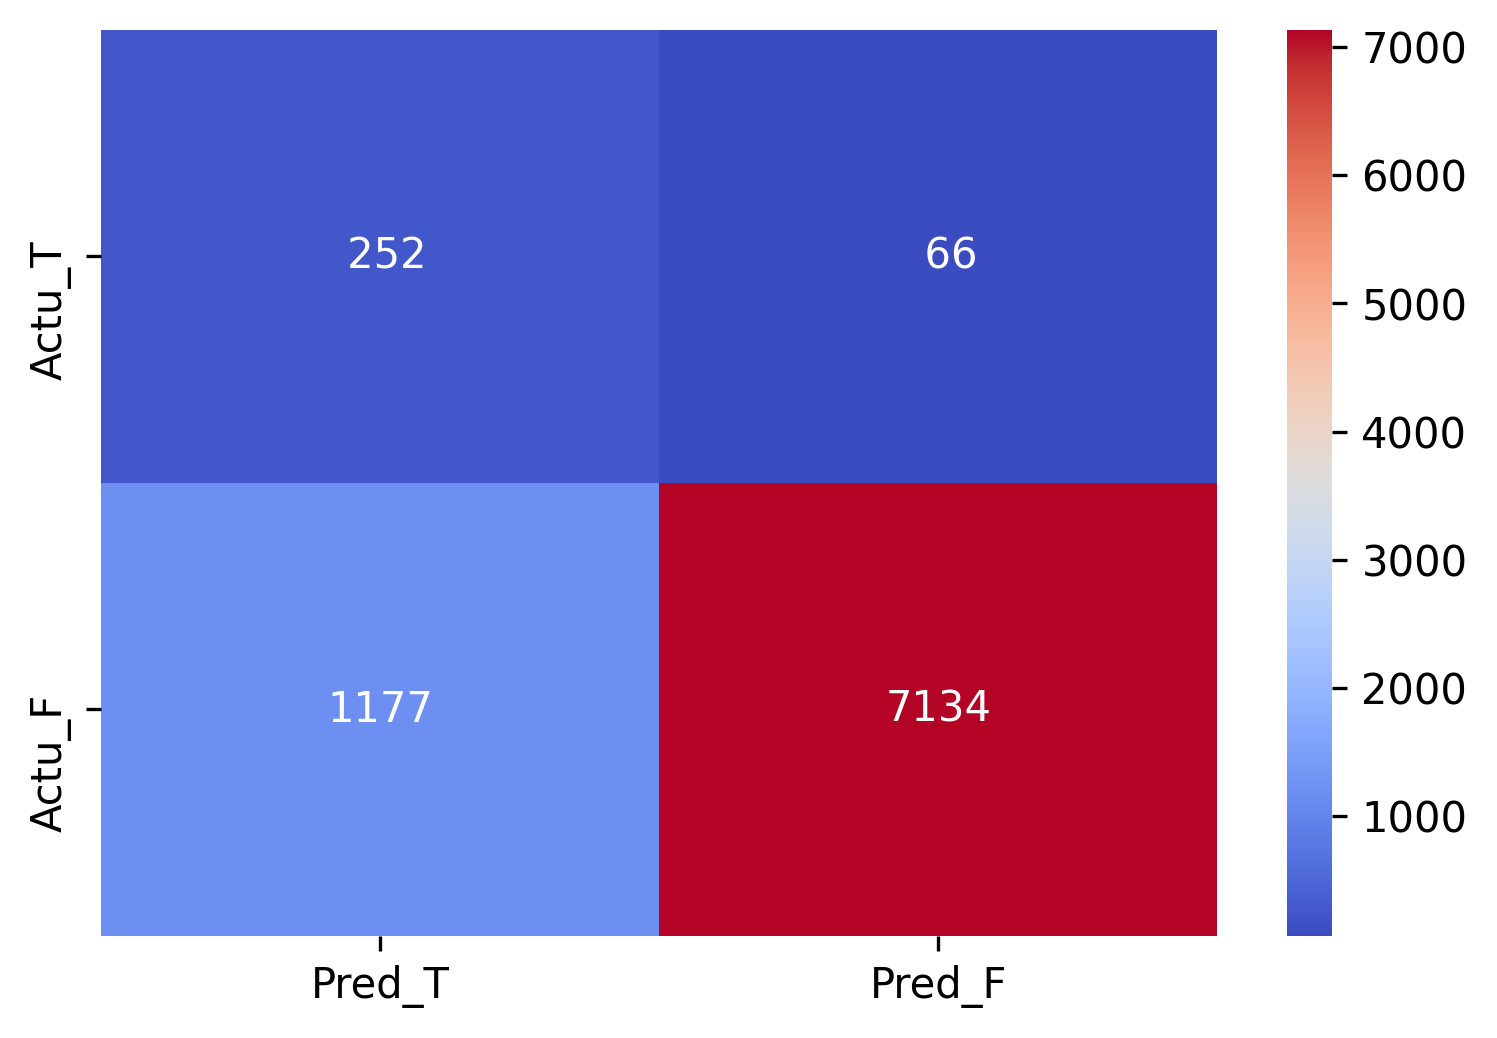

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred=y
plt.figure(dpi=300)
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='4d',xticklabels=['Pred_T','Pred_F'], yticklabels=['Actu_T','Actu_F'], cmap="coolwarm",annot=True)